<a href="https://colab.research.google.com/github/jcgs2503/Searching-for-Higgs-boson-decays-with-Deep-Learning/blob/main/ProjectA_chiehc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import warnings
from IPython.display import Image
from IPython.core.display import HTML 
import gzip
import shutil
warnings.filterwarnings('ignore')

# Project A: Searching for Higgs boson decays with Deep Learning 


## References

__[1]__ [Searching for Higgs Boson Decay Modes with Deep Learning](https://papers.nips.cc/paper/2014/hash/e1d5be1c7f2f456670de3d53c7b54f4a-Abstract.html)

__[2]__ [Decays of the Standard Model Higgs](https://profmattstrassler.com/articles-and-posts/the-higgs-particle/the-standard-model-higgs/decays-of-the-standard-model-higgs/)

## Overview

From __[1]__, “The Higgs boson is an elementary particle in the Standard Model of particle physics, produced by the quantum excitation of the Higgs field, one of the fields in particle physics theory.It is named after physicist Peter Higgs, who in 1964, along with six other scientists, proposed the mechanism, which suggested the existence of such a particle. Its existence was confirmed by the ATLAS and CMS collaborations based on collisions in the LHC at CERN.

On December 10, 2013, two of the physicists, Peter Higgs and François Englert, were awarded the Nobel Prize in Physics for their theoretical predictions. Although Higgs's name has come to be associated with this theory, several researchers between about 1964 and 1972 independently developed different parts of it.”

The Standard Model (SM) of particle physics predicts the existence of a Higgs boson. It was discovered at CERN in 2012 by the ATLAS and CMS collaborations, with contributions to the data analysis in the discovery paper by Neubauer’s research group at Illinois.

## Question 1

##### What is the Large Hadron Collider (LHC)? What is it about the LHC that makes it possible to project heavy particles like the Higgs boson?

The Large Hadron Collider is the largest and most powerful particle collider in the world. The LHC accelerates particles to near light speed and collide them. It is located under Switzerland and France near Geneva. 

Since accelerators are shaped as a circular ring, when accelerating or keeping a particle at a constant speed, the accelerator needs to exert a centripental force to the particle. As we all know, the centripental force is porportional to the particle's weight and the reciprocal of the ring's radius. Therefore, having a large radius enables the LHC to project heavier particles. 



## Question 2

##### The Higgs boson is the last particle in the SM to be discovered and completes the constituent picture of that theory in the SM. In what way(s) does the Higgs boson play a particularly important role in the SM?


The Higgs boson is a particle which is an exicitation of the Higgs field. In the SM, the Higgs boson particle explains the weak nuclear force and why other particles have mass. Moreover, since the SM does not completely explain the whole universe (neglecting gravity for example), it is important to discover and do research on the Higgs boson particle because it might lead the SM to a more complete theory of everything.

## Question 3

##### The Higgs boson is unstable and rapidly decays. The Higgs boson has several ways that it can decay (“decay modes”). What are these decay modes and what is decay probability for each? (Obviously not asking for any calculation here, just information from available references).

In [ ]:
Image(url= "https://profmattstrassler.files.wordpress.com/2011/12/lighthiggsbr_gap.png", width=400, height=400)

The letters "b", "c" and "g" stand for bottom quark, charm quark and gluon; the greek letters gamma and tau stand for photon and tau lepton.

According the the figure above from __[2]__, the probability of different decay modes changes as the Higgs mass energy changes. Dor a 125 GeV Standard Model Higgs, it's shown in the graph that :
- 60% of such particles would decay to bottom quark/antiquark pairs
- 21% would decay to W particles
- 9% would decay to two gluons
- 5% would decay to tau lepton/antilepton pairs
- 2.5% would decay to charm quark/antiquark pairs
- 2.5% would decay to Z particles 
- 0.2% would decay to two photons 
- 0.15% would decay to a photon and a Z particle


## Question 4

##### Briefly describe the ATLAS and CMS experiments that collect proton-proton collision data at the LHC to study the Higgs boson.

When two protons collides, the protons' constituents: quarks and gluons, are annhiliated. In a small fraction of collisions, Higgs or Z boson is formed. Such heavy states are unstable and will quickly decay into more stable particles (tau lepton/antilepton pairs). The processes could be described by :
- $ gg\rightarrow H \rightarrow\tau^+\tau^- $
- $ q\bar q\rightarrow Z\rightarrow\tau^+\tau^- $

Since these two processes results in the same final stable particles and the intermediate states are not observable, it is hard to distinguish the collisions that produce the Higgs boson. One way to solve this problem is to measure the information of the final state particles so that by calculating the invariant mass, scientists can identify the short-lived intermediate state. However, finite measurement resolution and escaping neutrinos make it impossible to calculate the intermediate state mass precisely. Therefore, the paper __[1]__ aims to train machine learning classifiers using data such as momentum and direction of the final state particles collected from simulated collisions using Monte Carlo programs. The trained classifiers are then used to analyze the experimental data.

##### The remaining questions refer to the following data source:

##### https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz 



## Question 5

What is the size and shape of the data set?


I utilized Google Colab to work on my project therefore I accessed the compressed data from my Google Drive. 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HIGGS.csv.gz', compression='gzip', error_bad_lines=False)

In [ ]:
print("shape : {}".format(data.shape))
print("size  : {}".format(data.size))

shape : (10999999, 29)
size  : 318999971


## Question 6

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the LHC accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. When you read through the reference paper (​https://arxiv.org/pdf/1402.4735.pdf​), what particle properties do those 28 features represent?

Low Level Features: 
1. Lepton $p_T$ 
2. Lepton $\eta$
3. Lepton $\phi$
4. Missing energy magnitude
5. Missing energy $\phi$
6. Jet 1 $p_T$
7. Jet 1 $\eta$
8. Jet 1 $\phi$
9. Jet 1 b-tag
10. Jet 2 $p_T$
11. Jet 2 $\eta$
12. Jet 2 $\phi$
13. Jet 2 b-tag
14. Jet 3 $p_T$
15. Jet 3 $\eta$
16. Jet 3 $\phi$
17. Jet 3 b-tag
18. Jet 4 $p_T$
19. Jet 4 $\eta$
20. Jet 4 $\phi$
21. Jet 4 b-tag

High Level Features: 
1. $M_{jj}$
2. $M_{jjj}$
3. $M_{lv}$
4. $M_{jlv}$
5. $M_{bb}$
6. $M_{Wb}$
7. $M_{WWbb}$

## Question 7

Using the data set, Could you draw the histogram of 28 normalized features for signal and background separately? Could you tell the significant differences from these histograms?

In [ ]:
import math
features = ['Lepton $p_T$', 
            'Lepton $\eta$',
            'Lepton $\phi$',
            'Missing energy magnitude',
            'Missing energy $\phi$',
            'Jet 1 $p_T$',
            'Jet 1 $\eta$',
            'Jet 1 $\phi$',
            'Jet 1 b-tag',
            'Jet 2 $p_T$',
            'Jet 2 $\eta$',
            'Jet 2 $\phi$',
            'Jet 2 b-tag',
            'Jet 3 $p_T$',
            'Jet 3 $\eta$',
            'Jet 3 $\phi$',
            'Jet 3 b-tag',
            'Jet 4 $p_T$',
            'Jet 4 $\eta$',
            'Jet 4 $\phi$',
            'Jet 4 b-tag',
            '$M_{jj}$',
            '$M_{jjj}$',
            '$M_{lv}$',
            '$M_{jlv}$',
            '$M_{bb}$',
            '$M_{Wb}$',
            '$M_{WWbb}$',
            ]

def plot(index,ax):
  clm = data.columns[index]
  signal_label = data.columns[0]
  signal = data[data[signal_label]==1][clm]*100
  background = data[data[signal_label]==0][clm]*100
  row = math.floor((index-1)/3)
  col = (index-1)%3
  ax[row,col].hist(signal,bins=30,density=True,range=(0,400),color="g",label="Signal",alpha=0.8)
  ax[row,col].hist(background,bins=30,density=True,range=(0,400),color="#FF0000", histtype="step",label="Background")
  ax[row,col].legend()
  ax[row,col].set_title(features[index-1])


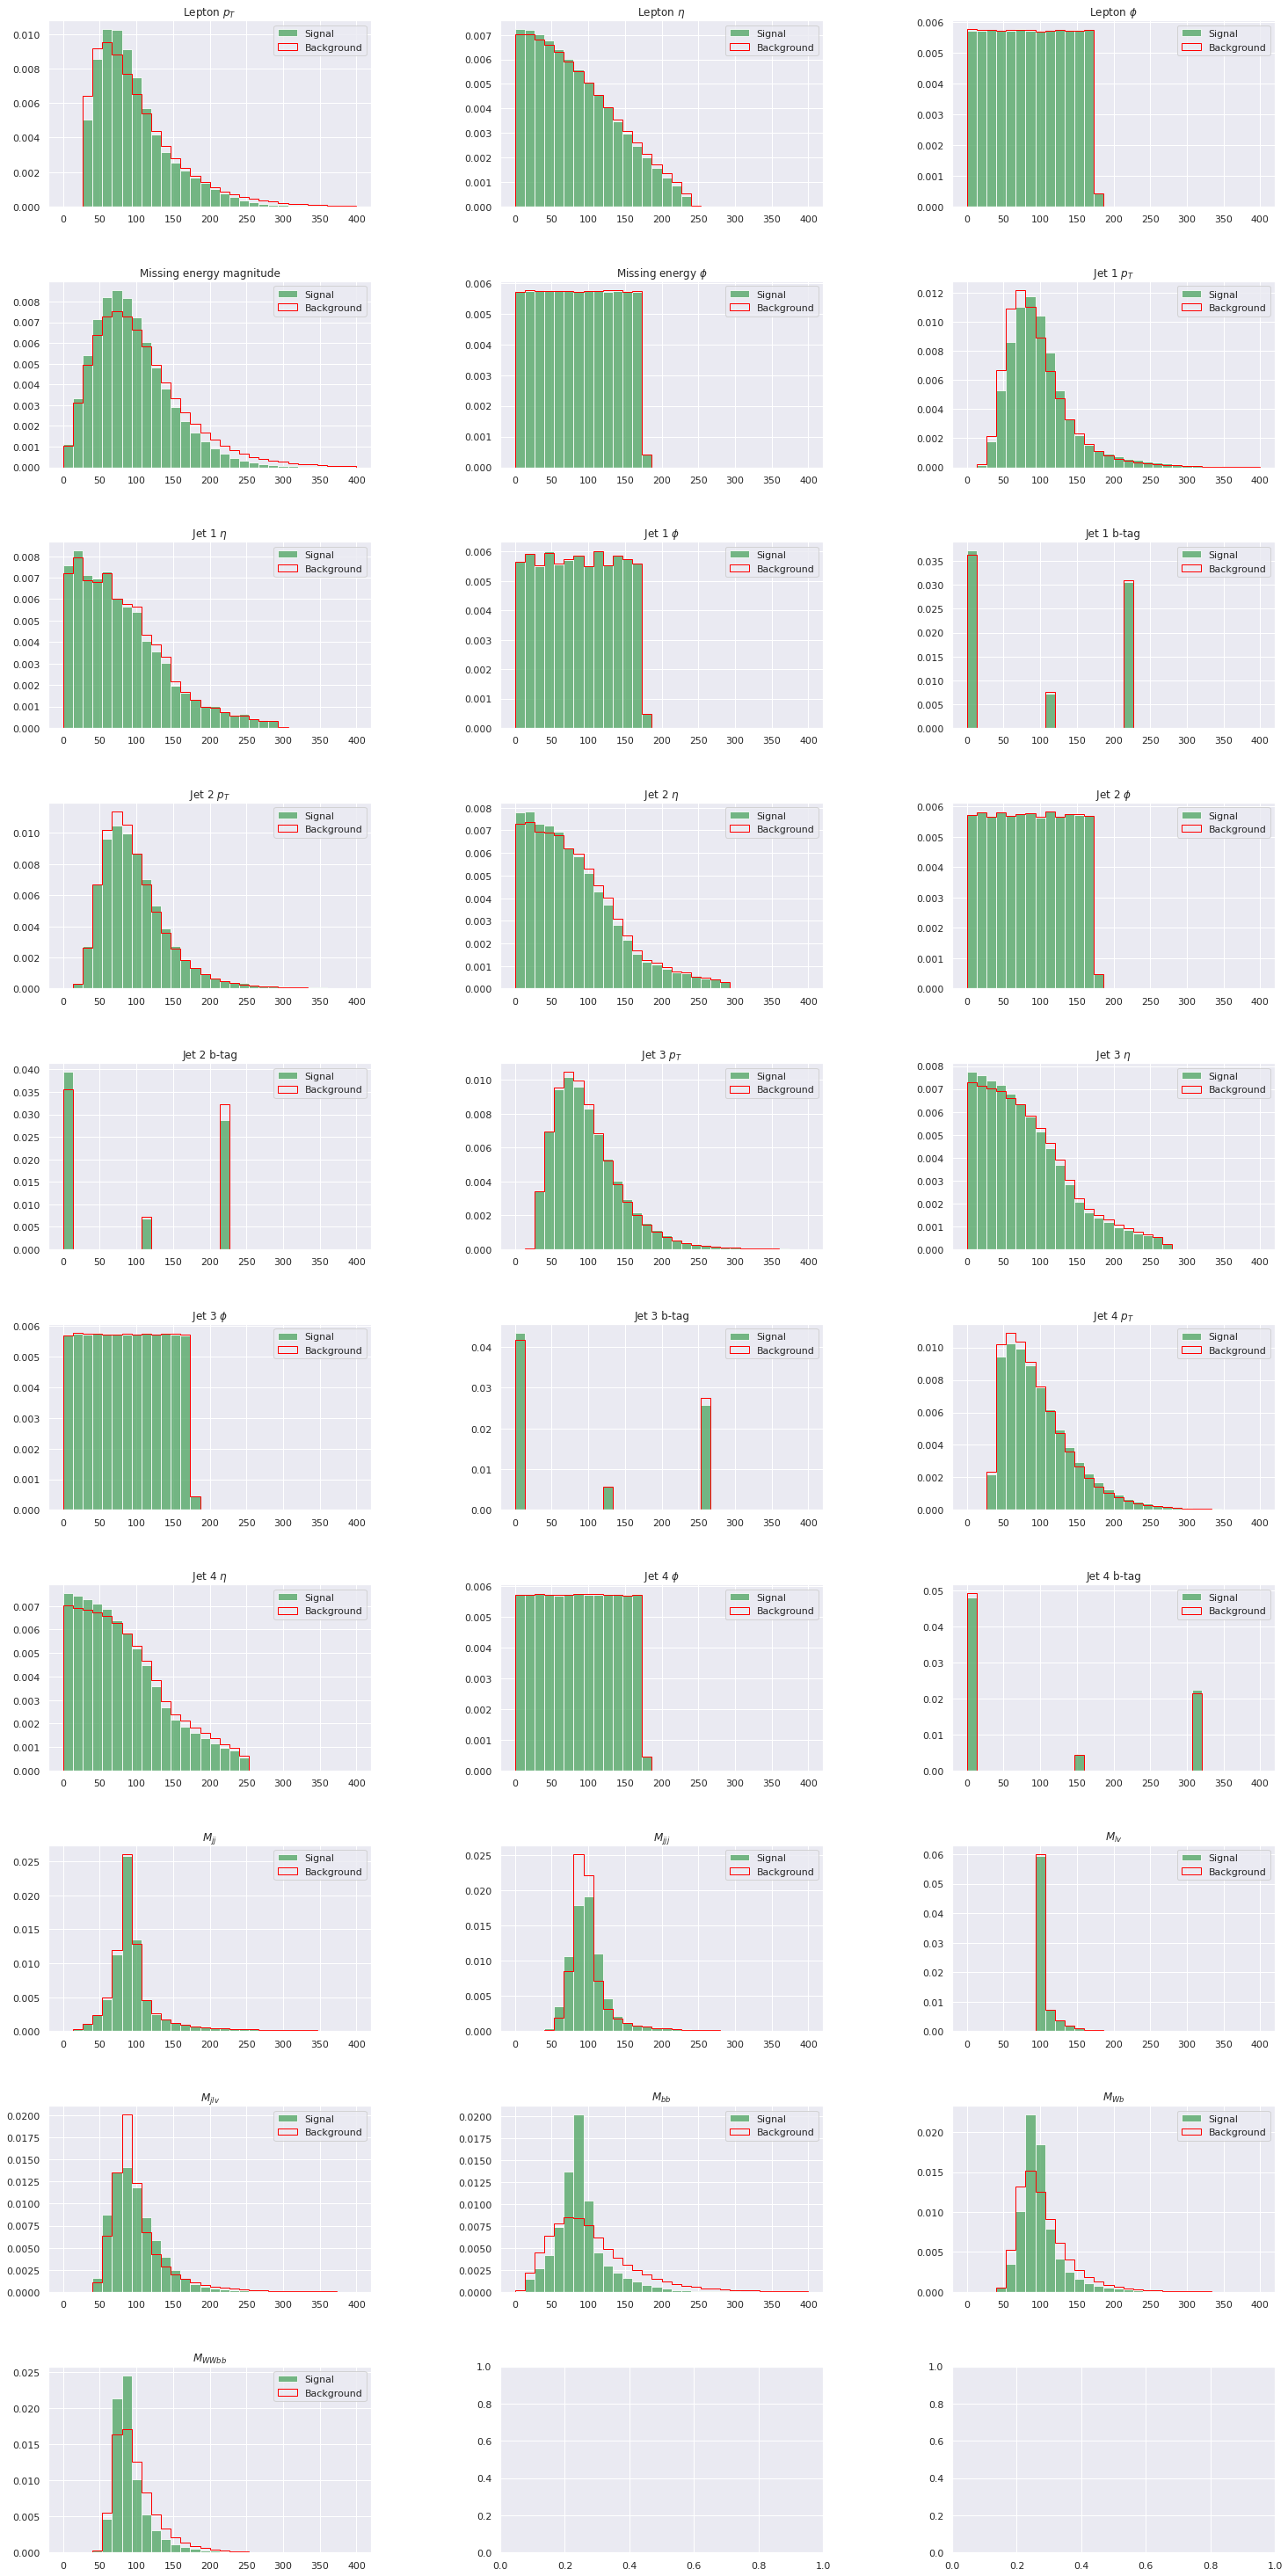

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(25,50))
fig.tight_layout()
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(1,29):
  plot(i,ax)
plt.show()

## Question 8

Implement and train one of the neural networks (NN) described in __[1]__. Be sure to set aside test data from the original data set which is not used in the training. You should implement a NN one that makes the training time manageable, like one of the shallow networks with hyperparameters shown in Table 1 of __[1]__ or even a smaller network. Can you show the NN classification output (analogous to Figure 4)?

In [ ]:
#Model Initialization
import torch

layer_1 = torch.nn.Linear(28,1000)
torch.nn.init.normal_(layer_1.weight, mean=0.0, std=0.1)

layer_2 = torch.nn.Linear(1000,1)
torch.nn.init.normal_(layer_2.weight, mean=0.0, std=0.001)

model = torch.nn.Sequential(
    layer_1,
    torch.nn.Tanh(),    
    layer_2,
    torch.nn.Sigmoid()
)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
#Data Preprocessing
TEST_DATA_COUNT = 1000000-1 #I used 1000000-1 so that the size of our train data could be divided by the batch size 100
random_state = np.random.RandomState(123)

#test_data
test_data = data.sample(n=TEST_DATA_COUNT,random_state=random_state)
test_output = test_data[test_data.columns[0]].to_numpy()
test_data_index = list(test_data.index.values)
test_data.drop(test_data.columns[0], inplace=True, axis=1)
test_input = test_data.to_numpy()

#train_data
train_data = data.loc[set(data.index) - set(test_data_index)]
train_output = train_data[train_data.columns[0]].to_numpy()
train_data.drop(train_data.columns[0], inplace=True, axis=1)
train_input = train_data.to_numpy()


In [ ]:
#creating train dataloader
tensor_x = torch.Tensor(train_input)
tensor_y = torch.Tensor(train_output)

dataset = TensorDataset(tensor_x,tensor_y) 
dataloader = DataLoader(dataset, batch_size=100, shuffle=True) 

In [ ]:
#creating test dataloader
tensor_x = torch.Tensor(test_input)
tensor_y = torch.Tensor(test_output)

dataset = TensorDataset(tensor_x,tensor_y) 
validationloader = DataLoader(dataset, batch_size=100, shuffle=True) 

In [ ]:
#Define functions for training one epoch
loss_fn = torch.nn.BCELoss()

def train_one_epoch(epoch_index, tb_writer):
  if epoch_index<25:
    momentum = 0.5 + epoch_index * (0.99-0.5)/24
  else:
    momentum = 0.99
  
  running_loss = 0.
  last_loss = 0.
  lr = 0.03
  for i, d in enumerate(dataloader):
    if lr/1.0000002 > 1e-6:
      lr = lr/1.0000002
    else:
      lr = 1e-6
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    optimizer.zero_grad()
  
    input, output = d
    model_output = model(input)
    model_output = model_output.reshape([100])

    loss = loss_fn(model_output, output)
    loss.backward()

    optimizer.step()
    running_loss += loss.item()
    if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(dataloader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

  return last_loss


In [ ]:
#Train Model
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/{}'.format(timestamp))

epoch_number = 0
EPOCHS = 50
best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    model.train(False)

    running_vloss = 0.0
    for i, vdata in enumerate(validationloader):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        voutputs = voutputs.reshape([voutputs.shape[0]])
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

串流輸出內容已截斷至最後 5000 行。
  batch 100000 loss: 0.5743064616918564
LOSS train 0.5743064616918564 valid 0.5711014866828918
EPOCH 2:
  batch 1000 loss: 0.5740241520702839
  batch 2000 loss: 0.575282720476389
  batch 3000 loss: 0.5745708537101746
  batch 4000 loss: 0.5731312310695649
  batch 5000 loss: 0.5733641751110554
  batch 6000 loss: 0.574426244199276
  batch 7000 loss: 0.571121372282505
  batch 8000 loss: 0.5731941075921059
  batch 9000 loss: 0.5714355063736438
  batch 10000 loss: 0.5706589177548885
  batch 11000 loss: 0.5696013542413711
  batch 12000 loss: 0.5711692299246788
  batch 13000 loss: 0.5690437627136707
  batch 14000 loss: 0.5706969314515591
  batch 15000 loss: 0.5689584901928901
  batch 16000 loss: 0.568816825479269
  batch 17000 loss: 0.567375924885273
  batch 18000 loss: 0.5672028799653053
  batch 19000 loss: 0.568205058068037
  batch 20000 loss: 0.5662166636288166
  batch 21000 loss: 0.5672781988382339
  batch 22000 loss: 0.569363752514124
  batch 23000 loss: 0.56607320627

In [ ]:
#Save trained model params
path = '/content/drive/MyDrive/Colab Notebooks/model_params.pth'
torch.save(model.state_dict(), path)

In [ ]:
#Import trained model parameters and evaluate output
path = '/content/drive/MyDrive/Colab Notebooks/model_params.pth'
model.load_state_dict(torch.load(path))
signal_data = data[data[data.columns[0]]==1]
signal_output = signal_data[signal_data.columns[0]].to_numpy()
signal_data.drop(data.columns[0], inplace=True, axis=1)
signal_input = signal_data.to_numpy()

background_data = data[data[data.columns[0]]==0]
background_output = background_data[background_data.columns[0]].to_numpy()
background_data.drop(data.columns[0], inplace=True, axis=1)
background_input = background_data.to_numpy()

model_signal_output = np.zeros_like(signal_output).astype(float)
model_background_output= np.zeros_like(background_output).astype(float)
for idx, d in enumerate(signal_input):
  model_signal_output[idx] = model(torch.Tensor(d))

for idx, d in enumerate(background_input):
  model_background_output[idx] = model(torch.Tensor(d))

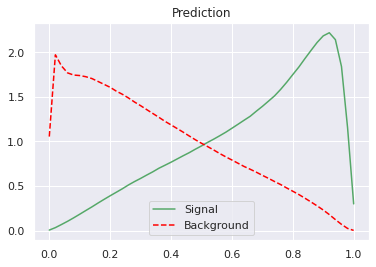

In [ ]:
import scipy.stats as stats
model_signal_output_density = stats.gaussian_kde(model_signal_output)
model_background_output_density = stats.gaussian_kde(model_background_output)
n,x,_ = plt.hist(model_signal_output,bins=50,density=True,range=(0,1),color="g", histtype="step", label="Signal", linestyle="solid")
n1,x1,_ = plt.hist(model_background_output,bins=50,density=True,range=(0,1),color="#FF0000", histtype="step",label="Background",linestyle='dashed')
plt.close()
plt.plot(x, model_signal_output_density(x),color="g",label="Signal")
plt.plot(x1, model_background_output_density(x1),color="#FF0000",label="Background",linestyle='dashed')
plt.legend()
plt.title('Prediction')
plt.show()

---

**Postprocessing for html export of notebook**

Python postamble (do not edit):

In [ ]:
!pip install jupyter_contrib_nbextensions >/dev/null
!jupyter nbconvert *.ipynb --to html_embed


[NbConvertApp] Converting notebook ProjectA_chiehc3.ipynb to html_embed
[NbConvertApp] try embedding url: https://profmattstrassler.files.wordpress.com/2011/12/lighthiggsbr_gap.png, format: png
[NbConvertApp] Writing 841702 bytes to ProjectA_chiehc3.html


Please see the full instructions at

https://illinois-mla.github.io/syllabus/assets/html-embed-export-tutorial.pdf

for what to do after this cell executes to obtain a pdf of your notebook.